<a href="https://colab.research.google.com/github/vu-bigdata-2020/example-notebooks/blob/master/analytics-examples/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://cdn.vanderbilt.edu/vu-www4/brandbar/svg/Optimized/vanderbilt.svg)


# Linear Regression

## About this Lesson
In this lesson, we will learn about and implement simple and multiple linear regression using scikit-learn.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simple Example

## Importing Data

We will use a slightly modified version of the Auto MPG data set from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Auto+MPG). The data is stored in comma-seperated value format (CSV), so we can use the Pandas library to read it into Python.

In [0]:
data = pd.read_csv("https://raw.githubusercontent.com/vu-bigdata-2020/example-notebooks/master/datasets/regression/auto-mpg.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Exploring Data

The data has a number of features which decribe several models of cars. We can use some of the built-in functions of Pandas to explore the data some more. First, lets try generating some basic statistics.

In [0]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


We can also select specific feature columns which we are interested in more than others. This process is called feature selection and is an important part of the data analysis process as we may have data for features which are unimportant or have a negative impact on the accuracy of the model. For example, lets try selecting information about mpg, cylinders, horepower, and weight.

In [0]:
features = data[['mpg', 'cylinders', 'horsepower', 'weight']]
features.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


We can also plot some of these features using Pandas and Matplotlib. Lets first try plotting some histograms.

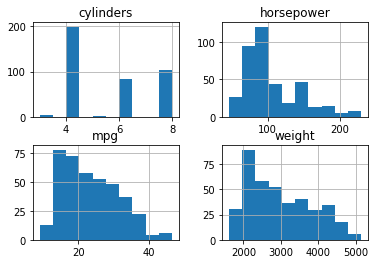

In [0]:
hist_data = features[['mpg', 'cylinders', 'horsepower', 'weight']]
hist_data.hist()
plt.show()

These histogram plots tell us some information about how the data is distributed. For example, we can see that the majority of cars have somewhere between 80 and 100 horsepower. Also, horsepower, mpg, and weight have distributions which appear to be fairly normal (guassian) while cylinders has a distiubution which is much more discrete. We can also plot these features against one another using scatter plots.

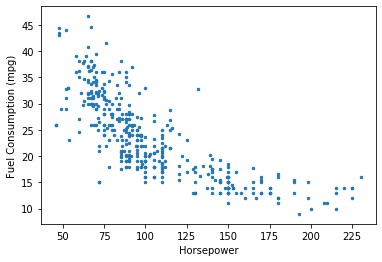

In [0]:
plt.scatter(features['horsepower'], features['mpg'], s=6)
plt.xlabel("Horsepower")
plt.ylabel("Fuel Consumption (mpg)")
plt.show()

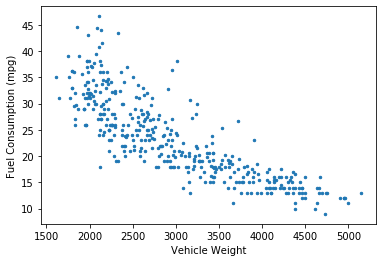

In [0]:
plt.scatter(features['weight'], features["mpg"], s=6)
plt.xlabel("Vehicle Weight")
plt.ylabel("Fuel Consumption (mpg)")
plt.show()

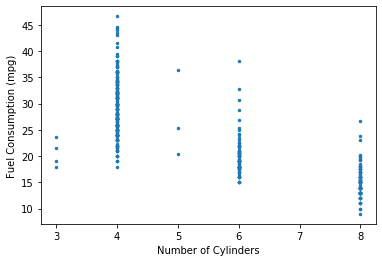

In [0]:
plt.scatter(features['cylinders'], features["mpg"], s=6)
plt.xlabel("Number of Cylinders")
plt.ylabel("Fuel Consumption (mpg)")
plt.show()

We can see from these plots that several of the variables seem to be related together while others seem to have significantly less relation to one other. This is a demonstration of why feature selection is important; we do not want to include features in our model which are not related to the variable we are trying to predict. We will use the relationships seen here in the next section to make predictions.

Now we will use the data that we just explored to make predictions. We can apply a simple linear regression to measure how variables relate to one another and to make predictions about some variables based on others. For this lesson, we will try to build a model to predict the fuel consumption (mpg) of cars based on their other attributes. 

To start, lets seperate the mpg data from the rest of the features that we will use for the model. Often, we will use the variable X to represent the features we will use to predict and the variable y to represent the target that we are predicting. So, that is what we will use here.

In [0]:
X = features[['cylinders', 'horsepower', 'weight']]
y = features["mpg"]

## Creating a Train and Test Split

One of the most important aspects of creating models is to be able to evaluate how well those models work. One way that we often do this in data science is to create a train-test split of the data. This process involves dividing (usually randomly) the full dataset into two mutually exclusive sets: one set that will be used to train the model and one set that will be used to test the model. This provides an accurate picture of how the model performs on data that it has never seen before.

We can use the scikit-learn library to divide the dataset into two parts. There are many different ways that we can split the data, but a common way is to use 80% of the data for training and 20% for testing, so that is what we will do here. In this case we will also set what is called a random seed to ensure that everyone in the class gets the same train-test split.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Simple Linear Regression

Now we are ready to create a predictive model. We will use the linear regression model from scikit-learn to create a model from the training data. For this first model, we will try relating a single feature, weight, to our target, fuel consumption.

In [0]:
from sklearn import linear_model

In [0]:
weight_data_train = np.array(X_train["weight"]).reshape(-1,1)
weight_data_test = np.array(X_test["weight"]).reshape(-1,1)

simple_model = linear_model.LinearRegression()
simple_model.fit(weight_data_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

For simple linear regression, the training solves for the equation of a line $y = MX + B$, which best fits the data. The model generates two parameters, the coefficients of the equation ($M$) and the intercept ($B$). We can get this information from the trained model.

In [0]:
print("Coefficients: ", simple_model.coef_)
print("Intercept: ", simple_model.intercept_)

Coefficients:  [-0.0074878]
Intercept:  45.57700228788817


To evaluate the model, we can plot the line which the model found against the data.

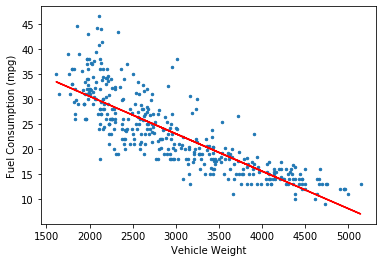

In [0]:
model_line = simple_model.coef_[0]*weight_data_train + simple_model.intercept_

plt.scatter(X["weight"], y, s=6)
plt.plot(weight_data_train, model_line, 'r')
plt.xlabel("Vehicle Weight")
plt.ylabel("Fuel Consumption (mpg)")
plt.show()

We can see that the model seems to fit the data quite well. To evaluate the model in a more quantatative way, we can use several statistical metrics and the testing data that we generated earlier. There are many different metrics for evaluating linear regression but three of the most popular and easy to interpret are mean absolute error, mean squared error, and the pearson correlation coefficient. We will use these three metrics from the scikit-learn library to evaluate our model.

Mean absolute error measures the absolute value of the difference between the model's result and the actual value of each tested point, and averages these errors. It is very easy to interpret because it is basically just the average error and can be interpreted in the same units as the target variable.

Mean squared error measures the square of the difference between the model's result and the actual value of each tested point, and averages these errors. Mean squared error is popular becuase it penalizes large error more than small ones, so it can sometimes give a better sense of how many really big errors are being committed.

The pearson correlation coefficient, also called $R^2$ value, measures how well a line fits to a set of data. This is clearly very useful for linear regression since the model generates a line. In general the best possible value is 1.0 and indicates that the line fits the data perfectly, and the value gets smaller if the model is worse.

In [0]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [0]:
predictions = simple_model.predict(weight_data_test)

print("Mean absolute error: %.2f" % mean_absolute_error(y_test, predictions))
print("Mean squared error: %.2f" % mean_squared_error(y_test, predictions))
print("R2 Score: %.2f" % r2_score(y_test, predictions))

Mean absolute error: 3.28
Mean squared error: 20.21
R2 Score: 0.71


## Multiple Linear Regression

While the model using a single variable did quite well at predicting fuel consumption, it is possible that we can do even better if we use more of the data. After all, the fuel consumption of a vehicle has more factors than just the weight of the vehicle! This is where multiple linear regression comes in. Instead of building the model with only a single predictor variable, we can instead use multiple. In our case, we will use three: cylinders, horsepower, and weight.

In [0]:
multiple_model = linear_model.LinearRegression()
multiple_model.fit(X_train, y_train)

print("Coefficients: ", multiple_model.coef_)
print("Intercept: ", multiple_model.intercept_)

Coefficients:  [-0.26247879 -0.04601979 -0.00521682]
Intercept:  45.007055169645184


We can see this time that the model generated 3 coefficients, corresponding to the three variables with which the model was trained. From these coefficients, we can also see what features are important to the model, reinforcing the idea of feature selection. The coefficient for number of cylinders is over ten times smaller than the coffeicients for the other two variables, indicating that it is not important to the model. It is more difficult to examine a multi-variable model using a plot, but we can still utilize the same metrics as before to evaluate the model quantitatively.

In [0]:
predictions = multiple_model.predict(X_test)

print("Mean absolute error: %.2f" % mean_absolute_error(y_test, predictions))
print("Mean squared error: %.2f" % mean_squared_error(y_test, predictions))
print("R2 Score: %.2f" % r2_score(y_test, predictions))

Mean absolute error: 3.23
Mean squared error: 19.12
R2 Score: 0.72


As you can see, utilizing multiple features improved the accuracy of the model by all three metrics. This demonstrates the power of the linear model. We can use many different features to predict the value of a complex system.

# Advanced Example

Now we will turn our attention to a more complex example. This time, we will create a model for air tempurature in an HVAC system in the Engineering Science building here at Vanderbilt. This data is a time series, meaning that the measurements are taken over time instead of instances, as in the previous example with the cars. Additionally, this data is significantly more complex and noisy.

## Import Data
We have a cleaned version of the HVAC data which tracks 21 features over a period of several months. We will create a model for the air temperature when the chiller (AC) is running. The data is stored in CSV format, so we can read it and remove any sections where the chiller is off using Pandas.

In [0]:
chiller_data = pd.read_csv("https://raw.githubusercontent.com/vu-bigdata-2020/example-notebooks/master/datasets/Chillers.csv")
chiller_data = chiller_data[chiller_data['PowChi'] != 0.]
chiller_data = chiller_data.iloc[0:30000] # Take the first 30,000 data points
chiller_data.reset_index(drop=True, inplace=True)

chiller_data.head()

,Time,FlowEvap,FreqFanA,FreqFanB,PerChiLoad,PerFreqFanA,PerFreqFanB,PerHumidity,PowChi,PowChiP,PowConP,PowCool,PowFanA,PowFanB,PowIn,TempAmbient,TempCondIn,TempCondOut,TempEvapIn,TempEvapOut,TempWetBulb
0,2018-01-03 09:25:00,0.001827,38.25,37.73,8.392382,0.638889,0.638889,0.441367,60700.0,17340.0,720.0,6262.577948,3490.000,3580.0,85830.000,-363.619476,291.33,291.24,281.97,281.15,266.256472
1,2018-01-03 09:30:00,0.001830,58.16,58.22,16.817750,0.965318,0.965318,0.422219,102600.0,17410.0,760.0,7419.907524,9839.999,9730.0,140339.999,-321.029740,283.73,296.32,281.29,280.32,266.155233
2,2018-01-03 09:35:00,0.001828,52.70,52.76,11.812660,0.874742,0.874742,0.422429,90700.0,17420.0,730.0,5119.705184,7140.000,7410.0,123400.000,-321.304584,280.53,296.47,280.90,280.23,266.431906
3,2018-01-08 06:05:00,0.001824,59.94,59.40,9.057196,1.000000,1.000000,0.760120,94400.0,17390.0,1380.0,4345.830392,10670.000,10390.0,134230.000,-1189.255741,292.12,293.42,281.92,281.35,274.996133
4,2018-01-08 06:10:00,0.001824,57.55,57.61,13.815340,0.955134,0.955134,0.769012,95400.0,17290.0,690.0,5642.885372,9270.000,9490.0,132140.000,-1215.361030,285.48,296.62,281.25,280.51,275.081894


The post-chiller temperature, or air temperature after the cooling has taken place, is stored in the column names *TempCondOut*, so we can plot that column over time to see the trend.

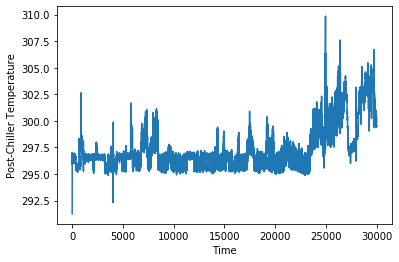

In [0]:
plt.plot(chiller_data['TempCondOut'])
plt.xlabel("Time")
plt.ylabel("Post-Chiller Temperature")
plt.show()

## Feature Selection

Experts have selected 7 of the remaining 20 features which contribute to the post-chiller temperature, so we will use these 7 features for our model.

In [0]:
feature_cols = ['TempCondIn', 'TempEvapIn', 'TempEvapOut', 'TempAmbient', 'TempWetBulb', 'FlowEvap', 'PowConP']
target_cols = ['TempCondOut']

## Training and Testing Split

For time-series data, each data point is related to the previous data points, which is what gives the behavior of a trend in data. So, it is not always ideal to do a random training and testing split as we did in the previous example. Instead, we will take the first 20% of the data points to train the model and we will test on the remaining 80%. This will allow us to see if the learned model accurately measures the trends by plotting the predicted values.

In [0]:
chiller_train, chiller_test = np.split(chiller_data, [int(.2*len(chiller_data))])

X_train = chiller_train[feature_cols].values
X_test = chiller_test[feature_cols].values
y_train = chiller_train[target_cols].values
y_test = chiller_test[target_cols].values

## Linear Regression Model

Now we are ready to create the model. We will again use multiple linear regression in scikit-learn with the 7 features extracted earlier and the post-chiller temperature as the target variable.

In [0]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
preds = reg.predict(X_test)

Since the data is a time series, we can plot the results of the predictive model with the actual values against time. You will notice that the plotted predicted values are not a stright line as they were earlier. It is important to remember that the linear relationship that the model found is between the features and the post-chiller temperature, while we are plotting the post-chiller temperature versus time.

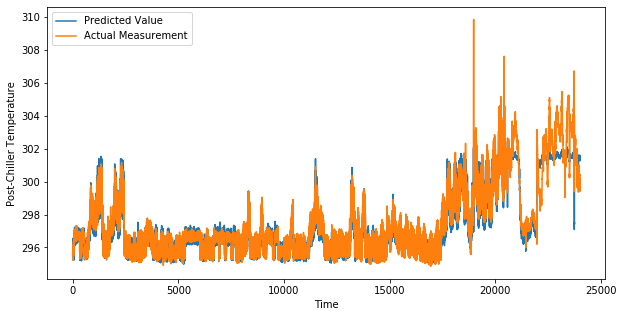

In [0]:
plt.figure(figsize=(10,5))
plt.plot(preds, label="Predicted Value")
plt.plot(y_test, label="Actual Measurement")
plt.xlabel("Time")
plt.ylabel("Post-Chiller Temperature")
plt.legend()
plt.show()

So we can see visually that the predictions follow the actual chiller values quite well. We can also once again use our metrics from earlier to evaluate the model in a more quantatative way.

In [0]:
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, preds))
print("Mean squared error: %.2f" % mean_squared_error(y_test, preds))
print("R2 Score: %.2f" % r2_score(y_test, preds))

Mean absolute error: 0.43
Mean squared error: 0.43
R2 Score: 0.91


As you can see, the model is very good based on our quantatative metrics as well. This shows the power of the simple linear model. We can very easily create an extremely accurate model of very complex real-world systems.